### Validation & Metrics
#### Date: 2026-01-19

**Topics**:
> 1. Validation: train/test/valid
> 2. Confusion matrix 
> 3. Classification Metrics: score, precision recall, f1-score
> 4. Regression Metrics: mse, mae, 

**Materials**:
> 1. [Classification metrics](https://www.geeksforgeeks.org/machine-learning/metrics-for-machine-learning-model/)
> 2. [Regression metrics](https://farshadabdulazeez.medium.com/essential-regression-evaluation-metrics-mse-rmse-mae-r%C2%B2-and-adjusted-r%C2%B2-0600daa1c03a)

##### Як зрозуміти, що модель працює добре?

Не всі помилки однаково небезпечні

Наприклад fraud-classification 
>  Пропустити шахрая -> фінансові втрати \
>  Заблокувати нормального користувача -> скарги, відтік

##### Churn client
Модель прогнозує: 0 - не пішов, 1 - пішов \
Всього **100** користувачів

**Fact:**
> 30 users реально пішли - 1 \
> 70 users реально залишились - 0

**Model predict:**
> 25 users підуть \
> 75 users не підуть 

**Важливі терміни:**
> **TP - True Positive**.  Приклад: модель дала predict, що user піде і він реально пішов \
> **FP - False Positive**. Приклад: модель дала predict, що user піде, але він не пішов \
> **FN - False Negative**. Приклад: модель дала predict, що user не піде, а він пішов \
> **TN - True Negative**.  Приклад: модель дала predict, що user не піде і він не пішов


> TP (True Positive) — правильно знайшли потрібний випадок \
> FP (False Positive) — помилково спрацювали \
> FN (False Negative) — пропустили те, що треба було знайти \
> TN (True Negative) — правильно не спрацювали

---
|                 | Модель сказала «1» | Модель сказала «0» |
| --------------- | ------------------ | ------------------ |
| **Насправді 1** | TP                 | FN                 |
| **Насправді 0** | FP                 | TN                 |

--- 

|                | **Predicted = 1** | **Predicted = 0** |
| -------------- | ----------------- | ----------------- |
| **Actual = 1** | **TP = 20**       | **FN = 10**       |
| **Actual = 0** | **FP = 5**        | **TN = 65**       |

---

![](https://images.squarespace-cdn.com/content/v1/5fbb9dabe7157107b90d84b0/1618028189800-X71247BY61E3QDMM6GJ1/Confusion%2BMatrix%2Bfigure%2B1.png)

![](https://images.prismic.io/encord/edfa849b-03fb-43d2-aba5-1f53a8884e6f_image5.png?auto=compress%2Cformat)

#### Accuracy
Частка правильних відповідей з усіх

**Формула:**
>  (TP + TN) / ALL = (20 + 65) / 100 = 0.85

---
#### Precision 
Точність позитивного прогнозу. Із усіх, кого модель позначила як _поганих_, скільки справді погані

**Формула:**
> TP / (TP + FP) = 20 / (20 + 5) = 0.80

---
#### Recall (повнота)
Із усіх реальних _поганих_ скільки модель змогла знайти.

**Формула:**
> TP / (TP + FN) = 20 / (20 + 10) ≈ 0.67

---
> **Precision** -> не нашкодити хорошим \
> **Recall**-> не пропустити поганих

---
#### F1 score - баланс між Precision і Recall

**Формула:**
> F1 = 2 * (P * R) / (P + R)


**F1 корисний:**
> класи незбалансовані \
> Precision і Recall однаково важливі \
> потрібно порівняти моделі між собою

**F1 НЕ МОЖНА використовувати:**
> якщо FP і FN мають різну ціну \
> якщо бізнесу важливий тільки Recall \
> якщо потрібне реальне бізнес-рішення

---
#### ROC-AUC

ROC-AUC — це верогідність того, что модель поставит випадкого 1 вище випадкого 0

![](https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg)

In [3]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset("titanic")
df.head()


y = df["survived"]

X = df[["pclass", "sex", "age", "fare"]]


In [4]:

X["sex"] = X["sex"].map({"male": 0, "female": 1})

X["age"] = X["age"].fillna(X["age"].median())


/var/folders/jg/4z3wkn2j4qg_d9rhsgxmg9340000gn/T/ipykernel_32209/1199543095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["sex"] = X["sex"].map({"male": 0, "female": 1})
/var/folders/jg/4z3wkn2j4qg_d9rhsgxmg9340000gn/T/ipykernel_32209/1199543095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["age"] = X["age"].fillna(X["age"].median())


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [7]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


In [8]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm


array([[133,  32],
       [ 27,  76]])

Значення у вас можуть відрізнятись!!!!
|            | Pred = 0 | Pred = 1 |
| ---------- | -------- | -------- |
| Actual = 0 | TN = 133 | FP = 32  |
| Actual = 1 | FN = 17  | TP = 76  |


> TP = 76 -> модель правильно знайшла survived \
> FP = 32 -> модель врятувала 32, але людина not survived \
> FN = 17 -> модель сказала not survived, але він survived \
> TN = 133 -> корректно визначині not survived


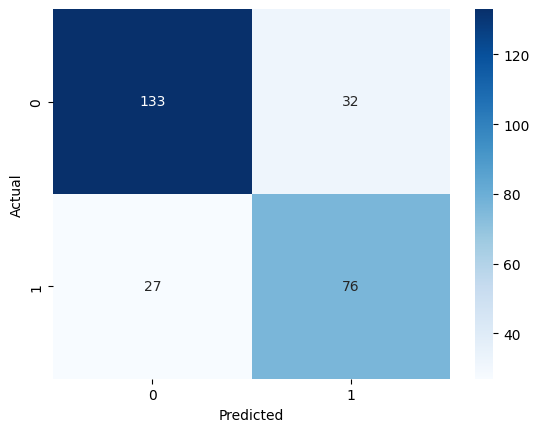

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [11]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)
roc_auc   = roc_auc_score(y_test, y_proba)

accuracy, precision, recall, f1, roc_auc


(0.7798507462686567,
 0.7037037037037037,
 0.7378640776699029,
 0.7203791469194313,
 0.8395116210650191)

Нам потрібно перевірити модель на даних, яких вона ніколи не бачила

Усі дані
 ├── Train
 ├── Validation
 └── Test

![](https://framerusercontent.com/images/qHCBprH2QBdww2TTap3IKNBTkUM.png?height=886&width=1240)

---
#### Train set 
Дані, на яких модель вчиться **знаходити закономірності**.


#### Validation set
Дані, які модель не використовує для навчання, але які ми використовуємо для прийняття рішень

**validation:**
> порівнюємо різні моделі \
> підбираємо гіперпараметри \
> обираємо threshold \
> дивимось, чи є overfitting \


#### Test set
Дані, які імітують реальний продакшен

![](https://miro.medium.com/v2/resize%3Afit%3A1400/1%2AtUJH4pDlIRujAxZ3I7aiBA.png)


#### Leakage - виток данних
Модель отримує інформацію, якої не матиме в реальному житті

> **Target leakage** \
> **Train–test leakage** (наприклад: нормалізація до split) \
> **Temporal leakage** (наприклад: данні із майбутьного, взяли avg за місяць який не закінчився) \
> **Aggregation leakage** (наприклад: порахувати avg за весь період, а не за період прогнозу)


| **Тип витоку даних (leakage)** | **Що робити**                                         |
| ------------------------------ | ----------------------------------------------------- |
| **Target leakage**             | Видалити ознаку                                       |
| **Temporal leakage**           | Перерахувати ознаки з урахуванням часу                |
| **Aggregation leakage**        | Обмежити вікно агрегації (тільки до моменту прогнозу) |
| **Train–test leakage**         | Виправити pipeline (усі перетворення — лише на train) |


### Метрики Regression 

#### Абсолютна помилка (AE)

Реальне значення: 100
Прогноз моделі: 85 
Помилка = 15

**Формула:**
> |y − ŷ|

---
#### MAE — Mean Absolute Error
Середня абсолютна помилка
В середньому ми помиляємось на X одиниць

![](https://towardsdatascience.com/wp-content/uploads/2021/05/15OQunI-NR-S0gAZFIit1Rw.png)

**Переваги:**
> легко пояснити бізнесу \
> в тих самих одиницях, що й таргет


**Недоліки:**
> всі помилки однаково важливі  
> не карає сильно великі промахи

---
#### MSE — Mean Squared Error
Кожну помилку підносимо до квадрату
Великі промахи стають дуже дорогими

**Недоліки:**
> одиниці виміру — квадратні \
> важко інтерпретувати


![](https://user-images.githubusercontent.com/14205986/165999302-eba3702d-81e3-4363-9c0e-d3bfceb7ec5a.png)

---
#### RMSE — Root Mean Squared Error
Квадратний корінь з MSE

**Приклади використання:**
> великі помилки критичні \
> штраф за промах має бути нелінійним \
> фінанси, SLA, час доставки

---
#### MAPE — відносна помилка
Середня абсолютна помилка у відсотках

![](https://arize.com/wp-content/uploads/2023/02/mape-how-to-calculate.png)



In [3]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [4]:
data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target  


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(0.5332001304956563, 0.5558915986952442, 0.575787706032451)

In [7]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, rmse_rf, r2_rf


(0.3275993549176358, 0.2557259876588585, 0.8048502475905297)

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
param_grid = {
    "n_estimators": [200],
    "max_depth": [None, 10, 20],
    "min_samples_leaf": [1, 5, 10],
    "max_features": ["sqrt"]
}

rf = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=3,
    n_jobs=-1
)

grid.fit(X_train, y_train)


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 5, ...], 'n_estimators': [200]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [10]:
grid.best_params_


{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [12]:
best_rf = grid.best_estimator_

y_pred_best = best_rf.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

mae_best, rmse_best, r2_best


(0.32811879338662825, 0.245517583769199, 0.8126404902240649)

In [ ]:
# LN: (0.5332001304956563, 0.5558915986952442, 0.575787706032451)
# RF: (0.3275993549176358, 0.2557259876588585, 0.8048502475905297)
# RF t: (0.32811879338662825, 0.245517583769199, 0.8126404902240649)